<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/rnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import scipy.io as sio
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import keras
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


In [0]:
#Input
mat_contents = sio.loadmat('augtestx.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty.mat')
test_y = np.array(mat_contents['test_y'])

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
train_y = np.array(mat_contents['train_y'])

trainy = train_y
testy = test_y
# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(train_y)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
print("Train_y one hot:", train_y.shape)
print("Test   _y one hot:", test_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")

Train_y one hot: (1200, 10)
Test   _y one hot: (600, 10)
(1200, 2800, 10)
(600, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 18s - loss: 0.0900 - acc: 0.1000
Epoch 2/50
 - 17s - loss: 0.0900 - acc: 0.1067
Epoch 3/50
 - 17s - loss: 0.0900 - acc: 0.0992
Epoch 4/50
 - 17s - loss: 0.0900 - acc: 0.0942
Epoch 5/50
 - 17s - loss: 0.0900 - acc: 0.1000
Epoch 6/50
 - 17s - loss: 0.0900 - acc: 0.0992
Epoch 7/50
 - 17s - loss: 0.0900 - acc: 0.1008
Epoch 8/50
 - 17s - loss: 0.0900 - acc: 0.1025
Epoch 9/50
 - 17s - loss: 0.0900 - acc: 0.1025
Epoch 10/50
 - 17s - loss: 0.0899 - acc: 0.1042
Epoch 11/50
 - 17s - loss: 0.0899 - acc: 0.1075
Epoch 12/50
 - 17s - loss: 0.0899 - acc: 0.0992
Epoch 13/50
 - 17s - loss: 0.0899 - acc: 0.1025
Epoch 14/50
 - 17s - loss: 0.0899 - acc: 0.1150
Epoch 15/50
 - 17s - loss: 0.0899 - acc: 0.1258
Epoch 16/50
 - 17s - loss: 0.0899 - acc: 0.1342
Epoch 

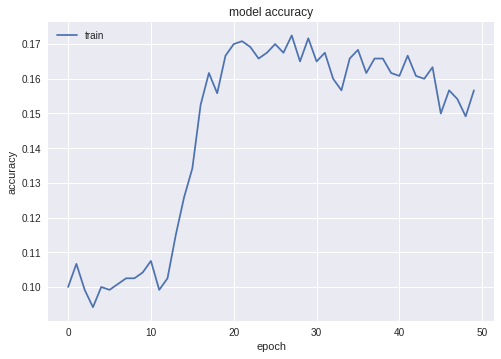

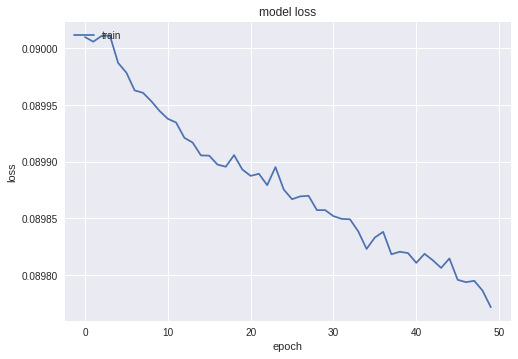

600/600 [==============================] - 3s 5ms/step
Test loss: 0.08978868216276169
Test accuracy: 0.1499999992052714


In [0]:
model = Sequential()
model.add(Conv1D(64, kernel_size=(10), activation='relu', 
                   data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', 
                   data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Dropout(0.5))
model.add(LSTM(5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mean_squared_error', 
                optimizer=optimizers.SGD(lr=0.1, momentum=0.9, decay=0.0005), 
                metrics=['accuracy'])

history_log = model.fit(train_x, train_y,batch_size=100,epochs=50,validation_split=0.0,verbose=2)
model.summary()
# summarize history for accuracy
plt.plot(history_log.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
  # summarize history for loss
plt.plot(history_log.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 